<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-03-18 14:32:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  39.0MB/s    in 4.0s    

2025-03-18 14:32:35 (37.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [9]:
def remove_outliers_iqr(df, column_name):
    """
    Removes outliers from a DataFrame column using the IQR method.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to check for outliers.
    >
    Returns:
    - df_cleaned (DataFrame): The DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers: Keep rows where the column value is between the lower and upper bounds
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

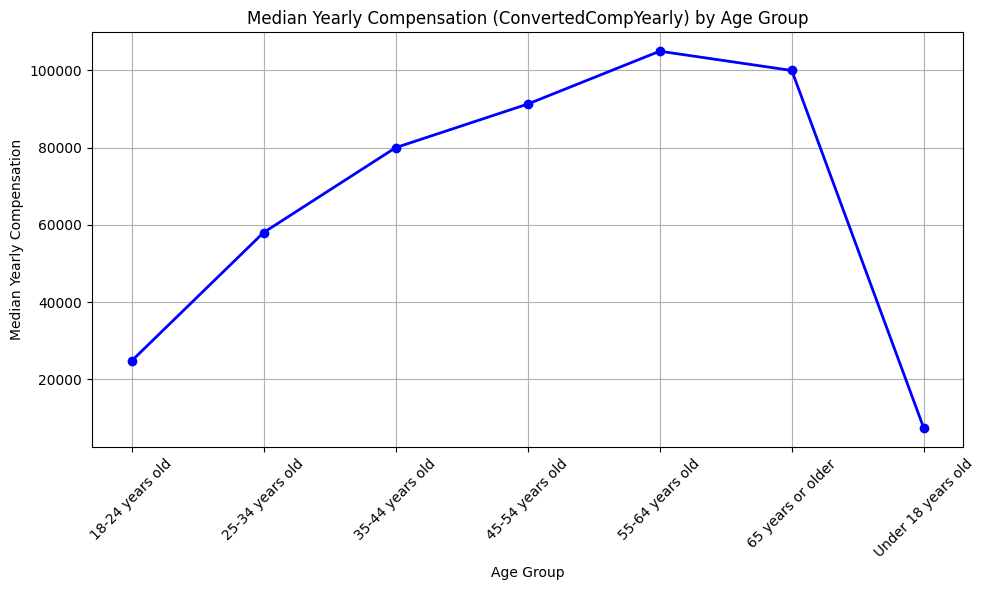

In [10]:
# Drop missing values for the relevant columns (Age and ConvertedCompYearly)
df_cleaned = df.dropna(subset=["Age", "ConvertedCompYearly"])

df_cleaned = df_cleaned[df_cleaned['Age'] != 'Prefer not to say']

#Removing outliers
df_cleaned = remove_outliers_iqr(df_cleaned,"ConvertedCompYearly")

# Group by Age and calculate the median for ConvertedCompYearly
age_group_median = df_cleaned.groupby("Age")["ConvertedCompYearly"].median()


# Plot a line chart for the median compensation across age groups
plt.figure(figsize=(10, 6))
age_group_median.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Chart title and labels
plt.title("Median Yearly Compensation (ConvertedCompYearly) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation")
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


Unique Age Groups: ['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Under 18 years old']


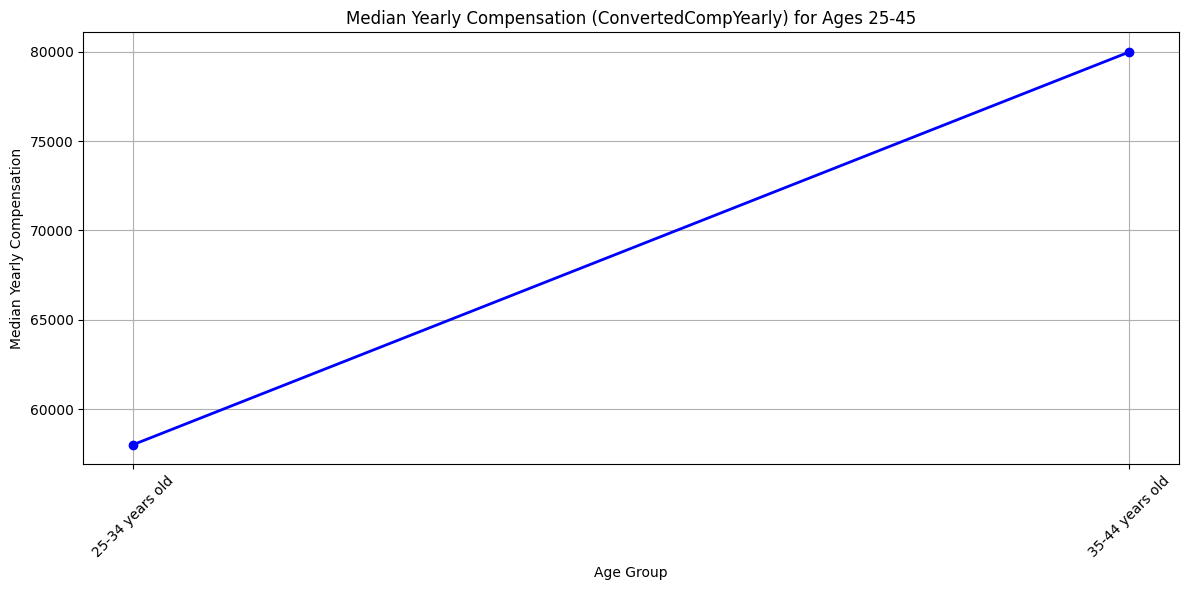

In [13]:
# Drop missing values for the relevant columns (Age and ConvertedCompYearly)
df_cleaned = df.dropna(subset=["Age", "ConvertedCompYearly"])

# Remove rows where the Age is 'Prefer not to say'
df_cleaned = df_cleaned[df_cleaned['Age'] != 'Prefer not to say']

# Removing outliers using the IQR method
df_cleaned = remove_outliers_iqr(df_cleaned, "ConvertedCompYearly")

# Check unique age groups to ensure the categories are correct
print("Unique Age Groups:", df_cleaned['Age'].unique())

# Filter for respondents aged between 25 and 45
age_filter = ['25-34 years old', '35-44 years old']
df_filtered = df_cleaned[df_cleaned['Age'].isin(age_filter)]

# Group by Age and calculate the median for ConvertedCompYearly
age_group_median = df_filtered.groupby("Age")["ConvertedCompYearly"].median()

# Plot a line chart for the median compensation across age groups
plt.figure(figsize=(12, 6))
age_group_median.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Chart title and labels
plt.title("Median Yearly Compensation (ConvertedCompYearly) for Ages 25-45")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation")

# Ensure the x-axis has the correct labels (sorted)
plt.xticks(ticks=range(len(age_group_median)), labels=age_group_median.index, rotation=45)

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'Something else'),
  Text(0.0, 0, 'Associate degree (A.A., A.S., etc.)'),
  Text(1.0, 0, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
  Text(2.0, 0, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
  Text(3.0, 0, 'Primary/elementary school'),
  Text(4.0, 0, 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'),
  Text(5.0, 0, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
  Text(6.0, 0, 'Some college/university study without earning a degree'),
  Text(7.0, 0, 'Something else'),
  Text(8.0, 0, '')])

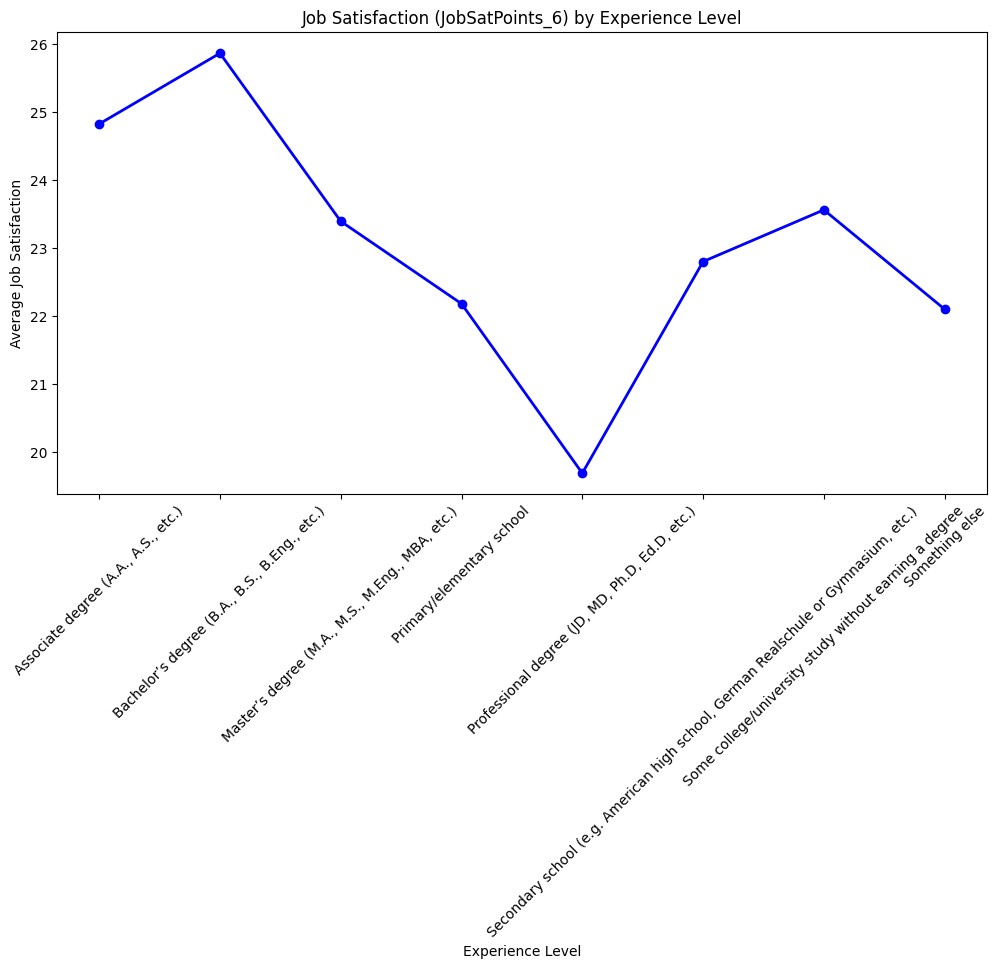

In [16]:
# Drop missing values for the relevant columns (Experience and JobSatPoints_6)
df_cleaned = df.dropna(subset=["EdLevel", "JobSatPoints_6"])

# If Experience column does not exist, you can use EmploymentType or any relevant column
# In this case, we'll use Experience for job satisfaction analysis

# Group by Experience and calculate the median or mean of JobSatPoints_6
experience_group_satisfaction = df_cleaned.groupby("EdLevel")["JobSatPoints_6"].mean()

# Plot a line chart for Job Satisfaction by Experience Level
plt.figure(figsize=(12, 6))
experience_group_satisfaction.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Chart title and labels
plt.title("Job Satisfaction (JobSatPoints_6) by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Job Satisfaction")
plt.xticks(rotation=45)


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [17]:

# Drop missing values for the relevant columns (WorkExp and ConvertedCompYearly)
df_cleaned = df.dropna(subset=["WorkExp", "ConvertedCompYearly"])

# If WorkExp column does not exist, replace it with another relevant experience column like EmploymentType or Experience
# For now, we assume the 'WorkExp' column represents the experience level.

# Group by WorkExp (experience) and calculate the median for ConvertedCompYearly
experience_group_compensation = df_cleaned.groupby("WorkExp")["ConvertedCompYearly"].median()

# Plot a line chart for the median compensation across experience levels
plt.figure(figsize=(12, 6))
experience_group_compensation.plot(kind='line', marker='o', color='g', linestyle='-', linewidth=2)

# Chart title and labels
plt.title("Median Yearly Compensation (ConvertedCompYearly) by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Median Yearly Compensation")
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


In [ ]:
## Write your code here

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
